In [1]:
## data analysis
import pandas as pd
import numpy as np
## Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
## Statistics
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf,pacf
## ML models
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima_model import ARMA , ARIMA
## metrics
from sklearn.metrics import explained_variance_score
## general
from datetime import datetime
from pylab import rcParams
rcParams['figure.figsize'] = 15,5

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
## reading the file
data = pd.read_csv("yahoo_stock_prices.txt",sep = ",")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-31,2060.590088,2062.540039,2043.619995,2043.939941,2043.939941,2655330000
1,2016-01-04,2038.199951,2038.199951,1989.680054,2012.660034,2012.660034,4304880000
2,2016-01-05,2013.780029,2021.939941,2004.170044,2016.709961,2016.709961,3706620000
3,2016-01-06,2011.709961,2011.709961,1979.050049,1990.260010,1990.260010,4336660000
4,2016-01-07,1985.319946,1985.319946,1938.829956,1943.089966,1943.089966,5076590000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


### Data info

We have total 7 features in our dataset. Out of them 
1 is datetime , 5 are float variables and 1 is int variable.

####  Data Dictionary`

### plotting adj closing rate of Yahoo

In [4]:
dates = [x[0] for x in list(data.values)]
values = [x[-2]for x in list(data.values)]
ndata = pd.DataFrame({"close_adj":values},index = dates)

In [5]:
data_train = ndata[:190]
data_test = ndata[190:]

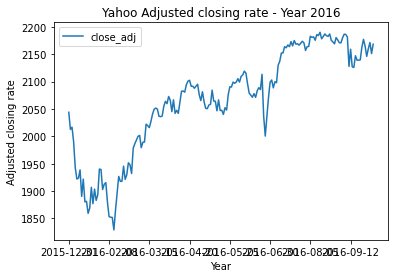

In [6]:
data_train.plot()
plt.xlabel('Year')
plt.ylabel("Adjusted closing rate")
plt.title("Yahoo Adjusted closing rate - Year 2016")
plt.show()

We can see definitive upward trend
exists. Moreover, it is seen that a seasonality exists (i.e., downward dip), repeating itself
every 4.5-month interval.

### evaluating stationary nature

In [7]:
def evaluate_stationarity(timeseries,t = 30):
    ## determing rolling statistics
    rolmean = timeseries.rolling(window = t).mean()
    rolstd = timeseries.rolling(window = t).std()
    
    # plotting rolling statitics
    orig = plt.plot(timeseries,color = 'blue',label = 'original')
    mean = plt.plot(rolmean,color = 'red',label = "Rolling mean")
    std = plt.plot(rolstd,color = 'black',label = "Rolling Std")
    plt.legend(loc = 'best')
    plt.title("Rolling Mean & Standard Deviation")
    plt.show(block = False)
    
    # perform Dickey-fuller test
    print("Results of Dickey-Fuller Test:")
    dftest =adfuller(timeseries,autolag="AIC")
    dfoutput = pd.Series(dftest[0:4],index = ["Test Statistics","p-value","#Lags Used","Number of observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical value (%s)"%key]= value
    print(dfoutput)

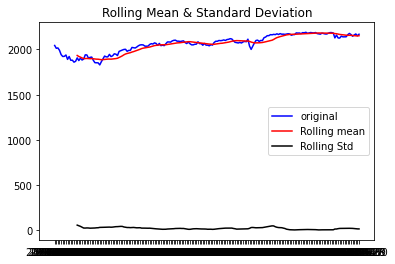

Results of Dickey-Fuller Test:
Test Statistics                 -1.080513
p-value                          0.722780
#Lags Used                       0.000000
Number of observations Used    189.000000
Critical value (1%)             -3.465431
Critical value (5%)             -2.876957
Critical value (10%)            -2.574988
dtype: float64


In [8]:
evaluate_stationarity(data_train["close_adj"],15)

We can see that despite variation in rolling standard deviation being small , rolling mean clearly seems to relatively vary a lot.
Hence our time series is non stationary. Moreover , we see that our p-value is greater than 0.05, thus we fail to reject our null hypothesis and accept that our time series is non-stationary.

#### making log transformations

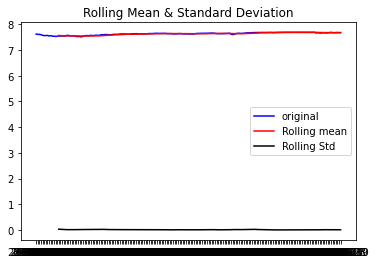

Results of Dickey-Fuller Test:
Test Statistics                 -1.106051
p-value                          0.712653
#Lags Used                       0.000000
Number of observations Used    189.000000
Critical value (1%)             -3.465431
Critical value (5%)             -2.876957
Critical value (10%)            -2.574988
dtype: float64


In [9]:
## Applying log transformation
data_log = np.log(data_train["close_adj"])
evaluate_stationarity(data_log,15)

Here we do not see much variation and our transformation made rolling mean and rolling std constant.
but our Dickey-Fuller test is still not proving our hypothesis. P-values is still greater than 0.05 , so we have to reject our null hypothesis.One thing can be it that our rolling mean must not be constant , lets check a zoomed version of this.

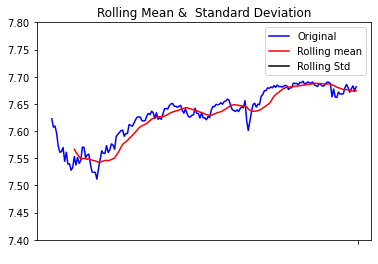

In [10]:
data_log = np.log(data_train["close_adj"])
rolmean = data_log.rolling(window=15).mean()
rolstd = data_log.rolling(window = 15).std()

#plotting rolling statistics
orig = plt.plot(data_log,color = 'blue',label = 'Original')
mean = plt.plot(rolmean,color = "red",label = "Rolling mean")
std = plt.plot(rolstd,color = "black",label = "Rolling Std")
plt.legend(loc = 'best')
plt.xticks(" ")
plt.ylim([7.4,7.8])
plt.title("Rolling Mean &  Standard Deviation")
plt.show(block = False)

Here we can see that rolling mean was not constant against time. and was varying much.

#### making square transformations

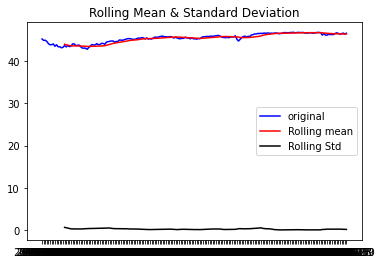

Results of Dickey-Fuller Test:
Test Statistics                 -1.092765
p-value                          0.717948
#Lags Used                       0.000000
Number of observations Used    189.000000
Critical value (1%)             -3.465431
Critical value (5%)             -2.876957
Critical value (10%)            -2.574988
dtype: float64


In [11]:
data_sqrt = np.sqrt(data_train['close_adj'])
evaluate_stationarity(data_sqrt,15)

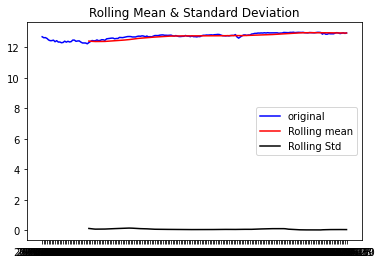

Results of Dickey-Fuller Test:
Test Statistics                 -1.097079
p-value                          0.716235
#Lags Used                       0.000000
Number of observations Used    189.000000
Critical value (1%)             -3.465431
Critical value (5%)             -2.876957
Critical value (10%)            -2.574988
dtype: float64


In [12]:
data_cube = np.cbrt(data_train['close_adj'])
evaluate_stationarity(data_cube)

We do not have any success with cube transformation too .Our rolling mean and dickey-fuller test is contradicting.

### Estimating Trend and Removing it from original Series

At first we need to estimate the trend and then remove it from yahoo stock time series object. 
We have two great methods of estimating trends.
- Moving Average Smoothing
- Exponentially weighted moving average

#### Moving Average Smoothing

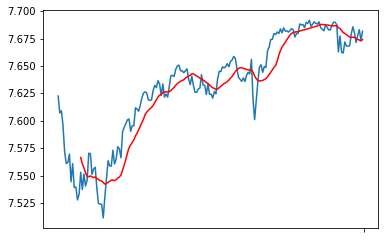

In [13]:
moving_avg = data_log.rolling(15).mean()
plt.plot(data_log)
plt.plot(moving_avg,color = 'red')
plt.xticks(' ')
plt.show()

The red line shows the rolling mean , i.e. estimated trend from moving averages.
Now we have to subtract trend from log transformed time series.We are taking window of 15 because rolling mean for 14 obs are nan.

In [14]:
data_log_mv_diff = data_log - moving_avg
data_log_mv_diff.head(15)

2015-12-31         NaN
2016-01-04         NaN
2016-01-05         NaN
2016-01-06         NaN
2016-01-07         NaN
2016-01-08         NaN
2016-01-11         NaN
2016-01-12         NaN
2016-01-13         NaN
2016-01-14         NaN
2016-01-15         NaN
2016-01-19         NaN
2016-01-20         NaN
2016-01-21         NaN
2016-01-22   -0.013354
Name: close_adj, dtype: float64

We should remove this Nan values.

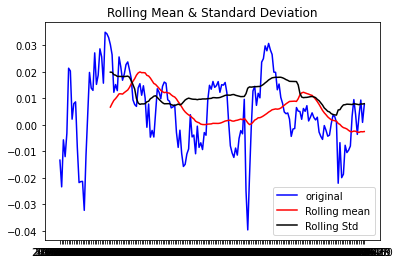

Results of Dickey-Fuller Test:
Test Statistics                 -4.192603
p-value                          0.000678
#Lags Used                       0.000000
Number of observations Used    175.000000
Critical value (1%)             -3.468280
Critical value (5%)             -2.878202
Critical value (10%)            -2.575653
dtype: float64


In [15]:
data_log_mv_diff.dropna(inplace = True)
evaluate_stationarity(data_log_mv_diff)

Now we can see that our rolling mean and rolling std are close to constant an d our hypothesis test is also proving our hypothesis. since p-value < 0.05.

#### Exponentially weighted moving average 

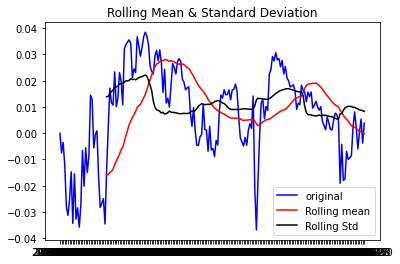

Results of Dickey-Fuller Test:
Test Statistics                 -3.468072
p-value                          0.008846
#Lags Used                       0.000000
Number of observations Used    189.000000
Critical value (1%)             -3.465431
Critical value (5%)             -2.876957
Critical value (10%)            -2.574988
dtype: float64


In [16]:
exp_wmv = data_log.ewm(15).mean()
data_log_ewma_diff = data_log - exp_wmv
evaluate_stationarity(data_log_ewma_diff)

We can see that here rolling mean is varying more than that of log values.hence we will go with log transformed trendless time series.

Removing just the trend have given us significant result.
Lets try removing both seasonality and trend.
### Removing sesonality and trend 

#### Differencing

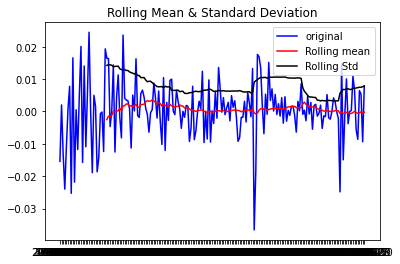

Results of Dickey-Fuller Test:
Test Statistics               -1.528243e+01
p-value                        4.558437e-28
#Lags Used                     0.000000e+00
Number of observations Used    1.880000e+02
Critical value (1%)           -3.465620e+00
Critical value (5%)           -2.877040e+00
Critical value (10%)          -2.575032e+00
dtype: float64


In [17]:
data_log_diff = data_log - data_log.shift()
data_log_diff.dropna(inplace = True)
evaluate_stationarity(data_log_diff)

2 order differencing


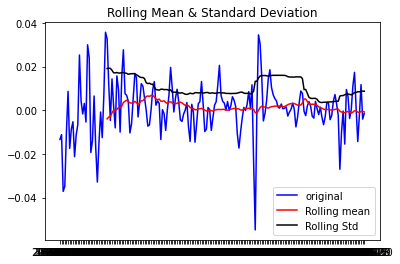

Results of Dickey-Fuller Test:
Test Statistics                 -5.083676
p-value                          0.000015
#Lags Used                       8.000000
Number of observations Used    179.000000
Critical value (1%)             -3.467420
Critical value (5%)             -2.877826
Critical value (10%)            -2.575452
dtype: float64
-----------------------------------
3 order differencing


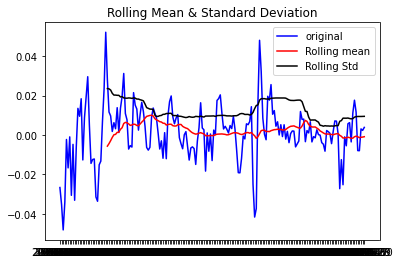

Results of Dickey-Fuller Test:
Test Statistics                 -3.361731
p-value                          0.012335
#Lags Used                      15.000000
Number of observations Used    171.000000
Critical value (1%)             -3.469181
Critical value (5%)             -2.878595
Critical value (10%)            -2.575863
dtype: float64
-----------------------------------


In [18]:
## trying with second and third order differencing
for i in [2,3]:
    print("%i order differencing"%i)
    data_log_diff_x = data_log - data_log.shift(i)
    data_log_diff_x.dropna(inplace = True)
    evaluate_stationarity(data_log_diff_x)
    print("-----------------------------------")

We can see that 2nd order results are proving much better , our test statistics is also significantly smaller than critical values and our rolling mean and rolling std are also constant.

#### Decomposing the time series into trend, seasonality and residuals.

The component of interest here will be residuals as both trend and seasonality will be removed from it.

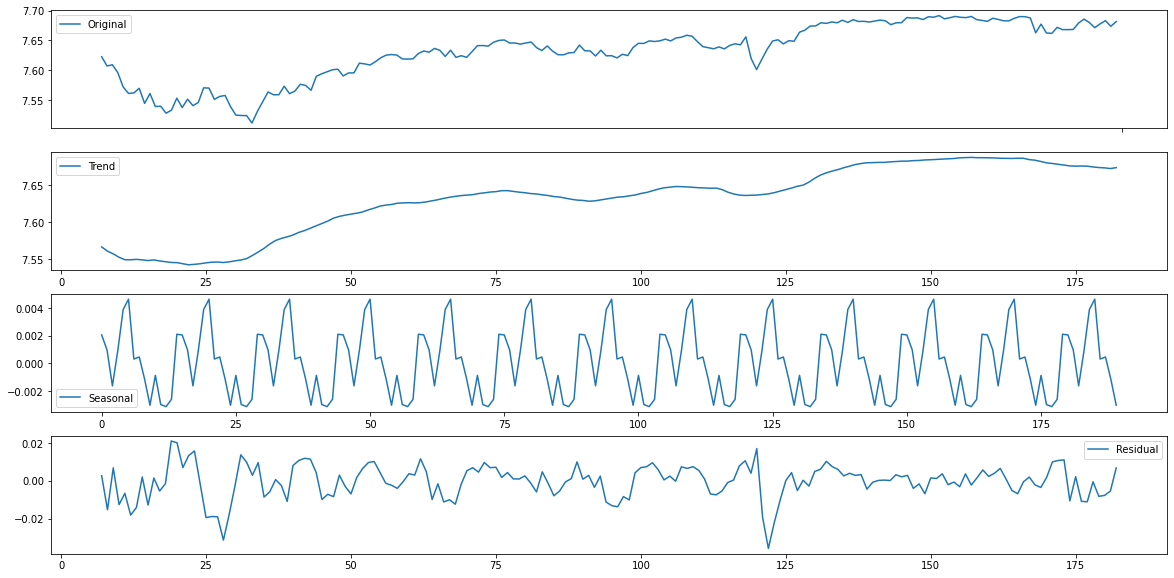

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(list(data_log),freq = 15)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize = (20,10))
plt.subplot(411)
plt.plot(data_log,label = 'Original')
plt.legend(loc = "best")
plt.xticks("")
plt.subplot(412)
plt.plot(trend,label="Trend")
plt.legend(loc = "best")
plt.subplot(413)
plt.plot(seasonal,label = "Seasonal")
plt.legend(loc = "best")
plt.subplot(414)
plt.plot(residual,label=  "Residual")
plt.legend(loc = "best")
#plt.tight_layout()
plt.show()

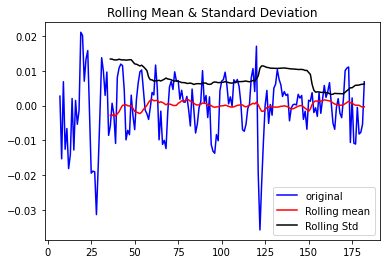

Results of Dickey-Fuller Test:
Test Statistics               -7.343896e+00
p-value                        1.047788e-10
#Lags Used                     4.000000e+00
Number of observations Used    1.710000e+02
Critical value (1%)           -3.469181e+00
Critical value (5%)           -2.878595e+00
Critical value (10%)          -2.575863e+00
dtype: float64


In [20]:
### checking stationarity of residuals
data_log_decompose = pd.Series(residual)
data_log_decompose.dropna(inplace = True)
evaluate_stationarity(data_log_decompose)

We can see a significant results as it depicts stationarity in both graph and in test.

### Checking Autocorrelation

In [21]:
sm.stats.durbin_watson(data_log_diff)

2.1907997214858606

We see that the statistics is close to 2 which ,means no correlation at all.

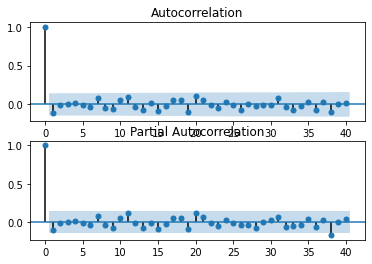

In [22]:
ax1 = plt.subplot(211)
fig = sm.graphics.tsa.plot_acf(data_log_diff,lags = 40,ax = ax1)
ax2 = plt.subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_log_diff,lags = 40,ax=ax2)

Hence our timeseries does not contain autocorrelation.

###  Forecasting

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


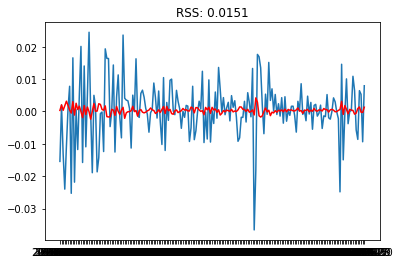

In [23]:
model = ARIMA(data_log,order = (2,1,0))
results_AR_210 = model.fit(disp = -1)
plt.plot(data_log_diff)
plt.plot(results_AR_210.fittedvalues,color = 'red')
plt.title("RSS: %.4f"%sum((results_AR_210.fittedvalues-data_log_diff)**2))
plt.show()

Applying MA model to Log transformed Differencing applied time series

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 0.0151')

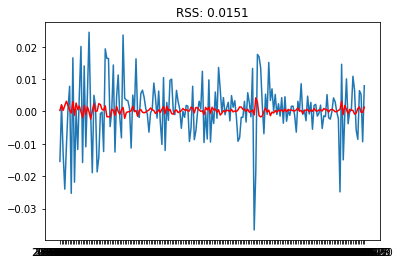

In [24]:
model = ARIMA(data_log,order = (0,1,1))
results_MA_011 = model.fit(disp=-1)  
plt.plot(data_log_diff)
plt.plot(results_MA_011.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA_011.fittedvalues-data_log_diff)**2))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS : 0.0151')

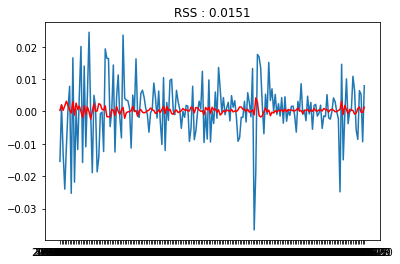

In [29]:
model  = ARIMA(data_log,order = (1,1,1))
results_ARIMA_111 = model.fit(disp = -1)
plt.plot(data_log_diff)
plt.plot(results_ARIMA_111.fittedvalues,color = 'red')
plt.title("RSS : %.4f"%sum((results_ARIMA_111.fittedvalues-data_log_diff)**2))

We have all the models with the same RSS score as 0.0151. Lets pick a random one and go with combined model.

## Scaling Back to forecast

In [30]:
predictions_ARIMA_diff = pd.Series(results_ARIMA_111.fittedvalues,copy = True)
print(predictions_ARIMA_diff.head())

2016-01-04    0.000318
2016-01-05    0.002022
2016-01-06    0.000342
2016-01-07    0.001805
2016-01-08    0.003168
dtype: float64


These seems to be absolute changes rather than cumulative sums at each time interval. Since our time series is continoues , it would be better to go with cumulative sums.

In [34]:
predictions_ARIMA_diff_cumsum = pd.Series(results_ARIMA_111.fittedvalues,copy = True).cumsum()

In [37]:
(predictions_ARIMA_diff_cumsum).head()

2016-01-04    0.000318
2016-01-05    0.002340
2016-01-06    0.002682
2016-01-07    0.004487
2016-01-08    0.007655
dtype: float64

We know that our model is performing well in minimizing residuals with good RSS, But lets check the quality of our model.

We can test the quality of model with AIC to test the quality of time series model. Lower the AIC, better the model.

In [38]:
print(results_ARIMA_111.aic)

-1238.3561602059258


We can see that our AIC is extremely low. Thus we can ensure the goodness of our model.

Now we have to scale back the forecasted series by reversing the differencing and log transformation. We have to traverse through following steps - 

- Remove differencing from forecasted series
- Reverse the log transformation by applying an exponent
- Evaluate the forecasted series by calculating mean forecast error, mean absolute error, and root mean absolute error
- Plot the orginal and forecasted series.

#### Removing differencing

In [40]:
predictions_ARIMA_log = pd.Series(data_log,index= data_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value = 0)
predictions_ARIMA_log.head()

2015-12-31    7.622635
2016-01-04    7.607530
2016-01-05    7.611563
2016-01-06    7.598703
2016-01-07    7.576522
dtype: float64

#### Removing log transformation from the series

([<matplotlib.axis.XTick at 0x7f10bcd4e950>],
 <a list of 1 Text major ticklabel objects>)

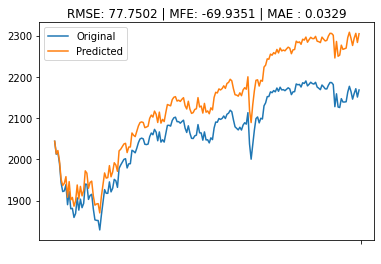

In [48]:
def mean_forecast_err(y,yhat):
  return y.sub(yhat).mean()
def mean_absolute_err(y,yhat):
  return np.mean((np.abs(y.sub(yhat).mean())/yhat))
def rmse(y,yhat):
  return np.sqrt(sum((yhat-y)**2)/len(y))

predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data_train['close_adj'],label = 'Original')
plt.plot(predictions_ARIMA,label = 'Predicted')

plt.title("RMSE: %.4f | MFE: %.4f | MAE : %.4f"%(rmse(data_train['close_adj'],predictions_ARIMA),mean_forecast_err(data_train['close_adj'],predictions_ARIMA),mean_absolute_err(data_train['close_adj'],predictions_ARIMA)))
plt.legend()
plt.xticks(' ')